# Mobilewalla - Data Science Assessment 

## Shriya Mandarapu

# Part 1 - EDA, Impute & Outliers

# Outline
- Loading Libraries
- Loading Data


### Load Libraries

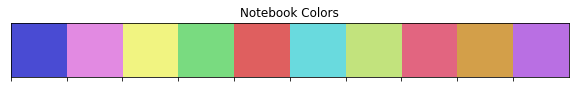

/Users/adarsh_23/mobilewalla_dataset/app_meta.txt
/Users/adarsh_23/mobilewalla_dataset/app_metadata_two.csv
/Users/adarsh_23/mobilewalla_dataset/app_propensity_data.csv
/Users/adarsh_23/mobilewalla_dataset/Untitled (2).ipynb
/Users/adarsh_23/mobilewalla_dataset/mice_imputed_values.csv
/Users/adarsh_23/mobilewalla_dataset/app_metadata.csv
/Users/adarsh_23/mobilewalla_dataset/train_data.csv
/Users/adarsh_23/mobilewalla_dataset/test_data.csv


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


colors = ['#494BD3','#E28AE2','#F1F481','#79DB80','#DF5F5F',
          '#69DADE','#C2E37D','#E26580','#D39F49','#B96FE3']

sns.palplot(sns.color_palette(colors))
plt.title('Notebook Colors', size = 12)
#plt.axis('off')
plt.show()

import warnings
warnings.filterwarnings("ignore")

#/Users/adarsh_23/mobilewalla_dataset
filepath = '/Users/adarsh_23/mobilewalla_dataset'
for dirname, _, filenames in os.walk('/Users/adarsh_23/mobilewalla_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Load Data

In [2]:
train = pd.read_csv(os.path.join(filepath, 'train_data.csv'))
train.head(2)

,ifa,platform,first_seen,last_seen,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,...,dev_cat_iab9_23,dev_cat_iab9_30,dev_cat_books,dev_cat_finance,dev_cat_games,dev_cat_lifestyle,dev_cat_navigation,dev_cat_productivity,dev_cat_reference,dev_cat_utilities
0,bf648e9f9bbe18fe6125713360be1e34dfa544b4fd91c8...,ANDROID,2020-01-02 16:07:14,2020-03-07 13:51:43,13.0,54,4.15385,1.0,8.0,0.0,...,0.0,0.071429,0.0,0.0,0.071429,0.153061,0.0,0.081633,0.0,0.112245
1,c7317fe8366d24119d193d4c7ce5b5c9762ab70015171d...,ANDROID,2019-03-01 12:45:55,2020-01-17 17:51:51,130.0,3571,27.46923,1.0,29.0,0.0,...,0.0,0.331195,0.0,0.0,0.257537,0.000000,0.0,0.001604,0.0,0.001710


In [3]:
print("Train Dataset - Shape: ",train.shape)
print("--------------------------------------------------------------")
train.describe()

Train Dataset - Shape:  (230263, 43)
--------------------------------------------------------------


,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,daypart_work,...,dev_cat_iab9_23,dev_cat_iab9_30,dev_cat_books,dev_cat_finance,dev_cat_games,dev_cat_lifestyle,dev_cat_navigation,dev_cat_productivity,dev_cat_reference,dev_cat_utilities
count,230263.000000,230263.000000,230263.000000,230263.000000,229188.000000,230263.000000,230263.000000,230263.000000,230263.000000,230263.000000,...,230031.000000,230031.000000,230031.000000,230031.000000,230031.000000,230031.000000,230031.000000,230031.000000,230031.000000,230031.000000
mean,110.296487,3691.911506,29.784212,0.869428,10.070161,0.001956,0.327670,0.531883,0.115616,0.352501,...,0.044734,0.140911,0.001541,0.000344,0.054793,0.008390,0.000093,0.066534,0.000627,0.109963
std,119.764555,13482.677822,89.977826,0.336933,10.032108,0.033722,0.338309,0.215459,0.121270,0.203546,...,0.096349,0.149885,0.014747,0.006508,0.069674,0.039699,0.003690,0.092150,0.010457,0.108964
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,294.000000,7.653850,1.000000,4.000000,0.000000,0.012579,0.403220,0.036880,0.217465,...,0.000000,0.003713,0.000000,0.000000,0.000000,0.000000,0.000000,0.001956,0.000000,0.010063
50%,71.000000,1027.000000,14.557520,1.000000,7.000000,0.000000,0.192857,0.532260,0.091930,0.336360,...,0.000000,0.089202,0.000000,0.000000,0.021592,0.000000,0.000000,0.021430,0.000000,0.069831
75%,153.000000,3077.000000,29.308800,1.000000,13.000000,0.000000,0.626305,0.666670,0.153370,0.461540,...,0.029923,0.243440,0.000000,0.000000,0.092938,0.000000,0.000000,0.095770,0.000000,0.205980
max,1262.000000,996971.000000,9352.333330,1.000000,167.000000,0.999682,1.000000,1.000000,1.000000,1.000000,...,0.666667,1.000000,0.333213,0.250000,0.333333,0.500000,0.460349,0.500000,0.618652,0.500000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230263 entries, 0 to 230262
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ifa                   230263 non-null  object 
 1   platform              229625 non-null  object 
 2   first_seen            230263 non-null  object 
 3   last_seen             230263 non-null  object 
 4   num_days              230263 non-null  float64
 5   brq                   230263 non-null  int64  
 6   brq_engagement        230263 non-null  float64
 7   gender                230263 non-null  float64
 8   distinct_app          229188 non-null  float64
 9   skewness_female       230263 non-null  float64
 10  skewness_male         230263 non-null  float64
 11  daypart_home          230263 non-null  float64
 12  daypart_other         230263 non-null  float64
 13  daypart_work          230263 non-null  float64
 14  device_category       227598 non-null  object 
 15  

In [5]:
num_cols= train.drop(['gender'], axis=1).select_dtypes('number').columns

cat_cols = train.select_dtypes('object').columns

print(f'Numerical Columns:  {train[num_cols].columns}')
print('\n')
print(f'Categorical Columns: {train[cat_cols].columns}')

Numerical Columns:  Index(['num_days', 'brq', 'brq_engagement', 'distinct_app', 'skewness_female',
       'skewness_male', 'daypart_home', 'daypart_other', 'daypart_work',
       'cellular', 'wifi', 'dev_cat_iab1', 'dev_cat_iab1_1', 'dev_cat_iab1_6',
       'dev_cat_iab12', 'dev_cat_iab13', 'dev_cat_iab14', 'dev_cat_iab15',
       'dev_cat_iab15_10', 'dev_cat_iab17', 'dev_cat_iab19',
       'dev_cat_iab19_29', 'dev_cat_iab20', 'dev_cat_iab3', 'dev_cat_iab5',
       'dev_cat_iab7', 'dev_cat_iab9', 'dev_cat_iab9_23', 'dev_cat_iab9_30',
       'dev_cat_books', 'dev_cat_finance', 'dev_cat_games',
       'dev_cat_lifestyle', 'dev_cat_navigation', 'dev_cat_productivity',
       'dev_cat_reference', 'dev_cat_utilities'],
      dtype='object')


Categorical Columns: Index(['ifa', 'platform', 'first_seen', 'last_seen', 'device_category'], dtype='object')


### Data - Preliminary Observations -
- Shape:  (230263, 43)
- Numeric - 38 (37 float, 1 int), Categorical - 5
- Target Variable - Gender - is categorical - binary - labelled 0/1
- first seen & last seen - timestamps - can be used to extract - month/dow/etc. 
- There are null values that need attention

In [6]:
## EDA

In [7]:
eda = train.copy()
print('IFA : ')
print(eda['ifa'].nunique())
print('All unique ifa values!')
print('-----------------------------------------------')
print('Platform - ')
print(eda['platform'].value_counts())
print('-----------------------------------------------')
print('Platform-Gender breakdown: ')
print(eda.groupby('platform')['gender'].value_counts())
print('-----------------------------------------------')
print('Target Variable - Gender - Breakup : ')
print(eda['gender'].value_counts())
print(eda['gender'].value_counts()/len(eda['gender']))

IFA : 
230263
All unique ifa values!
-----------------------------------------------
Platform - 
ANDROID    225891
IOS          3734
Name: platform, dtype: int64
-----------------------------------------------
Platform-Gender breakdown: 
platform  gender
ANDROID   1.0       196759
          0.0        29132
IOS       1.0         2907
          0.0          827
Name: gender, dtype: int64
-----------------------------------------------
Target Variable - Gender - Breakup : 
1.0    200197
0.0     30066
Name: gender, dtype: int64
1.0    0.869428
0.0    0.130572
Name: gender, dtype: float64


## Target Variable - Gender looks quite imbalanced!

In [8]:
eda.columns

Index(['ifa', 'platform', 'first_seen', 'last_seen', 'num_days', 'brq',
       'brq_engagement', 'gender', 'distinct_app', 'skewness_female',
       'skewness_male', 'daypart_home', 'daypart_other', 'daypart_work',
       'device_category', 'cellular', 'wifi', 'dev_cat_iab1', 'dev_cat_iab1_1',
       'dev_cat_iab1_6', 'dev_cat_iab12', 'dev_cat_iab13', 'dev_cat_iab14',
       'dev_cat_iab15', 'dev_cat_iab15_10', 'dev_cat_iab17', 'dev_cat_iab19',
       'dev_cat_iab19_29', 'dev_cat_iab20', 'dev_cat_iab3', 'dev_cat_iab5',
       'dev_cat_iab7', 'dev_cat_iab9', 'dev_cat_iab9_23', 'dev_cat_iab9_30',
       'dev_cat_books', 'dev_cat_finance', 'dev_cat_games',
       'dev_cat_lifestyle', 'dev_cat_navigation', 'dev_cat_productivity',
       'dev_cat_reference', 'dev_cat_utilities'],
      dtype='object')

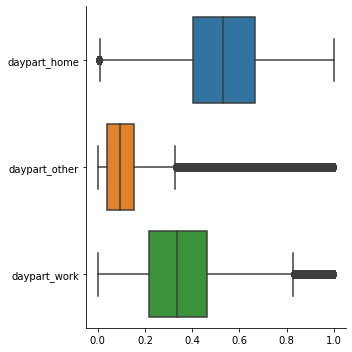

In [9]:
sns.catplot(data=eda[['daypart_home', 'daypart_other', 'daypart_work']], orient="h", kind="box")

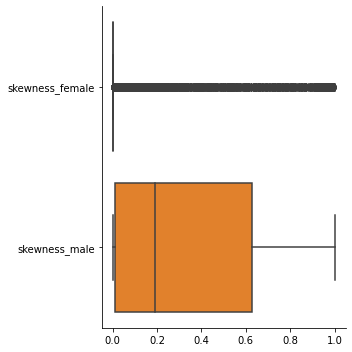

In [10]:
g = sns.catplot(data=eda[['skewness_female',
       'skewness_male']], orient="h", kind="box")
g.set(xscale="linear")

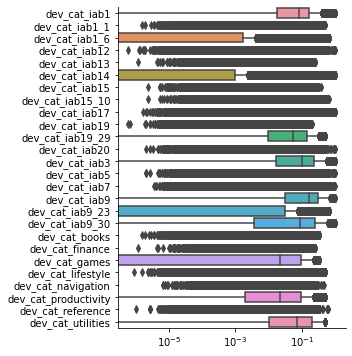

In [11]:
g = sns.catplot(data=eda[['dev_cat_iab1', 'dev_cat_iab1_1',
       'dev_cat_iab1_6', 'dev_cat_iab12', 'dev_cat_iab13', 'dev_cat_iab14',
       'dev_cat_iab15', 'dev_cat_iab15_10', 'dev_cat_iab17', 'dev_cat_iab19',
       'dev_cat_iab19_29', 'dev_cat_iab20', 'dev_cat_iab3', 'dev_cat_iab5',
       'dev_cat_iab7', 'dev_cat_iab9', 'dev_cat_iab9_23', 'dev_cat_iab9_30',
       'dev_cat_books', 'dev_cat_finance', 'dev_cat_games',
       'dev_cat_lifestyle', 'dev_cat_navigation', 'dev_cat_productivity',
       'dev_cat_reference', 'dev_cat_utilities']], orient="h", kind="box")
g.set(xscale="log")

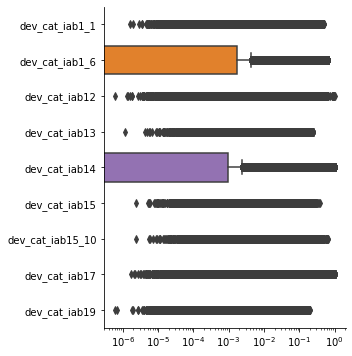

In [12]:
g = sns.catplot(data=eda[['dev_cat_iab1_1',
       'dev_cat_iab1_6', 'dev_cat_iab12', 'dev_cat_iab13', 'dev_cat_iab14',
       'dev_cat_iab15', 'dev_cat_iab15_10', 'dev_cat_iab17', 'dev_cat_iab19']], orient="h", kind="box")
g.set(xscale="log")

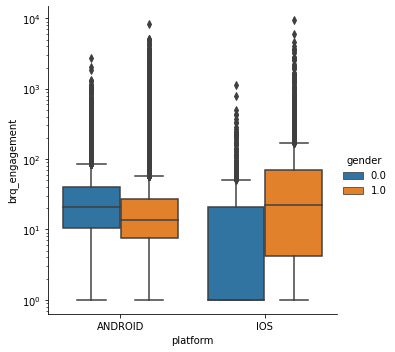

In [13]:
g = sns.catplot(x = 'platform', y = 'brq_engagement', data = eda, hue = 'gender',kind="box")
g.set(yscale="log")

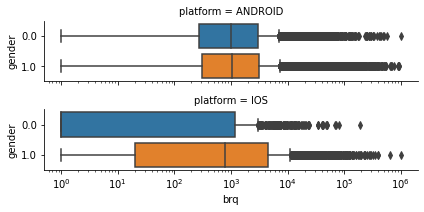

In [14]:
g = sns.catplot(x="brq", y="gender", row="platform",
                kind="box", orient="h", height=1.5, aspect=4,
                data=eda)
g.set(xscale="log")

## Null Values -

In [15]:
eda.isnull().sum()

ifa                        0
platform                 638
first_seen                 0
last_seen                  0
num_days                   0
brq                        0
brq_engagement             0
gender                     0
distinct_app            1075
skewness_female            0
skewness_male              0
daypart_home               0
daypart_other              0
daypart_work               0
device_category         2665
cellular                  45
wifi                      45
dev_cat_iab1             232
dev_cat_iab1_1           232
dev_cat_iab1_6           232
dev_cat_iab12            232
dev_cat_iab13            232
dev_cat_iab14            232
dev_cat_iab15            232
dev_cat_iab15_10         232
dev_cat_iab17            232
dev_cat_iab19            232
dev_cat_iab19_29         232
dev_cat_iab20            232
dev_cat_iab3             232
dev_cat_iab5             232
dev_cat_iab7             232
dev_cat_iab9             232
dev_cat_iab9_23          232
dev_cat_iab9_3

### 26 columns (dev_cat_iab/lifestyle/prod etc) + cellular/wifi + device_category (categorical - can go with mode) + distinct_app + platform (categorical - can go with mode) 

Looks like the dev_cat_.. 26 columns which have same number of null values i.e;  232 must be missing in the exact same rows. Let\'s check that

In [16]:
cols = ['first_seen','last_seen','dev_cat_iab1', 'dev_cat_iab1_1',
       'dev_cat_iab1_6', 'dev_cat_iab12', 'dev_cat_iab13', 'dev_cat_iab14',
       'dev_cat_iab15', 'dev_cat_iab15_10', 'dev_cat_iab17', 'dev_cat_iab19',
       'dev_cat_iab19_29', 'dev_cat_iab20', 'dev_cat_iab3', 'dev_cat_iab5',
       'dev_cat_iab7', 'dev_cat_iab9', 'dev_cat_iab9_23', 'dev_cat_iab9_30',
       'dev_cat_books', 'dev_cat_finance', 'dev_cat_games',
       'dev_cat_lifestyle', 'dev_cat_navigation', 'dev_cat_productivity',
       'dev_cat_reference', 'dev_cat_utilities']
col_vals = eda[cols]
mask = col_vals['dev_cat_iab1'].isnull() 
col_vals[mask]

,first_seen,last_seen,dev_cat_iab1,dev_cat_iab1_1,dev_cat_iab1_6,dev_cat_iab12,dev_cat_iab13,dev_cat_iab14,dev_cat_iab15,dev_cat_iab15_10,...,dev_cat_iab9_23,dev_cat_iab9_30,dev_cat_books,dev_cat_finance,dev_cat_games,dev_cat_lifestyle,dev_cat_navigation,dev_cat_productivity,dev_cat_reference,dev_cat_utilities
170,2020-03-14 11:27:43,2020-03-24 09:55:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,2020-03-13 22:12:47,2020-03-14 09:17:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1747,2020-02-24 15:24:29,2020-02-24 15:26:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891,2020-03-28 05:22:37,2020-03-31 06:34:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2444,2020-02-29 08:59:31,2020-03-30 05:18:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224975,2020-02-09 07:50:56,2020-02-09 10:13:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226287,2020-01-16 13:30:26,2020-01-16 13:30:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228985,2020-03-10 12:14:53,2020-03-30 06:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229309,2020-02-10 11:51:18,2020-02-17 10:37:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Yes! All columns are missing values in the exact same rows. We can either delete these rows or replace with the closest estimate such as mean/median/mode depending on the distribution of these columns. 

In [17]:
cols[2:]

['dev_cat_iab1',
 'dev_cat_iab1_1',
 'dev_cat_iab1_6',
 'dev_cat_iab12',
 'dev_cat_iab13',
 'dev_cat_iab14',
 'dev_cat_iab15',
 'dev_cat_iab15_10',
 'dev_cat_iab17',
 'dev_cat_iab19',
 'dev_cat_iab19_29',
 'dev_cat_iab20',
 'dev_cat_iab3',
 'dev_cat_iab5',
 'dev_cat_iab7',
 'dev_cat_iab9',
 'dev_cat_iab9_23',
 'dev_cat_iab9_30',
 'dev_cat_books',
 'dev_cat_finance',
 'dev_cat_games',
 'dev_cat_lifestyle',
 'dev_cat_navigation',
 'dev_cat_productivity',
 'dev_cat_reference',
 'dev_cat_utilities']

Column : dev_cat_iab1


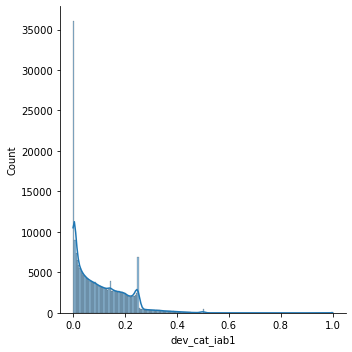

-----------------------------
Column : dev_cat_iab1_1


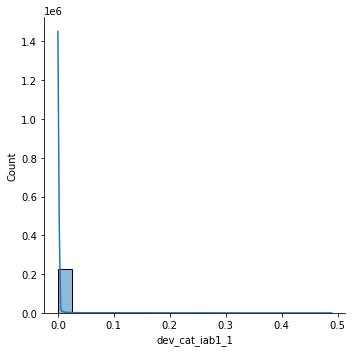

-----------------------------
Column : dev_cat_iab1_6


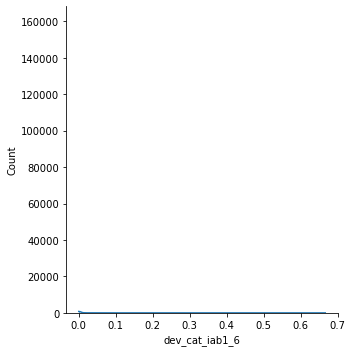

-----------------------------
Column : dev_cat_iab12


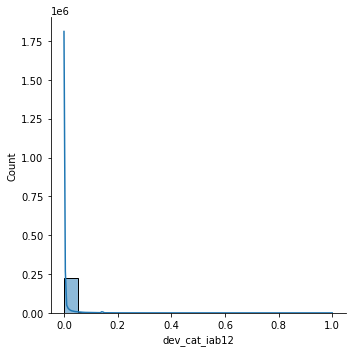

-----------------------------
Column : dev_cat_iab13


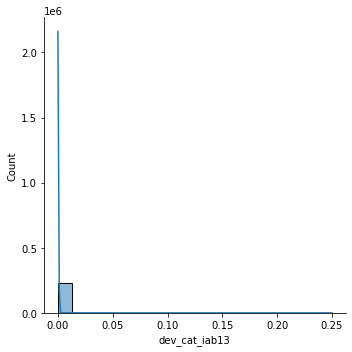

-----------------------------
Column : dev_cat_iab14


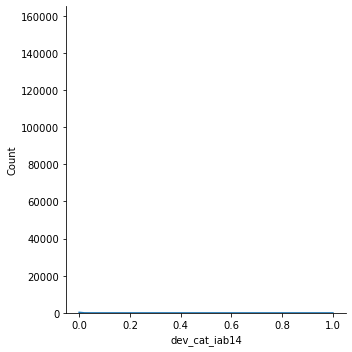

-----------------------------
Column : dev_cat_iab15


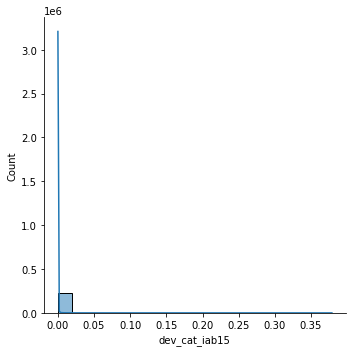

-----------------------------
Column : dev_cat_iab15_10


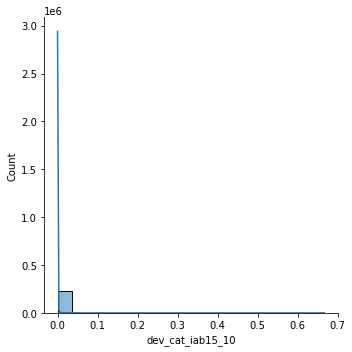

-----------------------------
Column : dev_cat_iab17


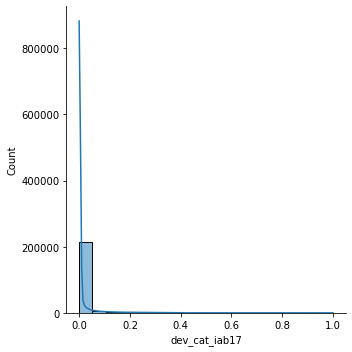

-----------------------------
Column : dev_cat_iab19


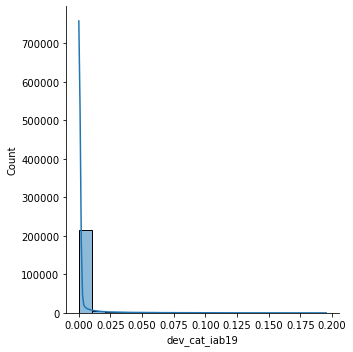

-----------------------------
Column : dev_cat_iab19_29


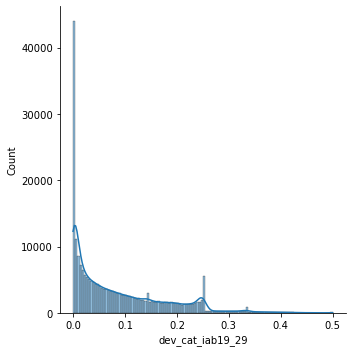

-----------------------------
Column : dev_cat_iab20


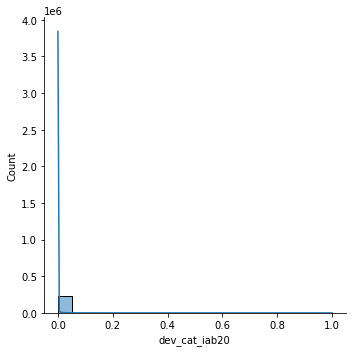

-----------------------------
Column : dev_cat_iab3


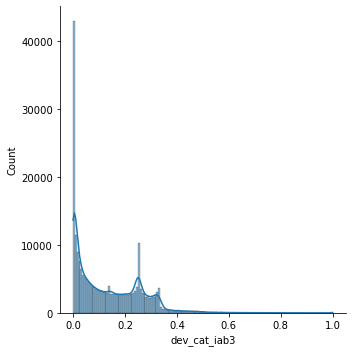

-----------------------------
Column : dev_cat_iab5


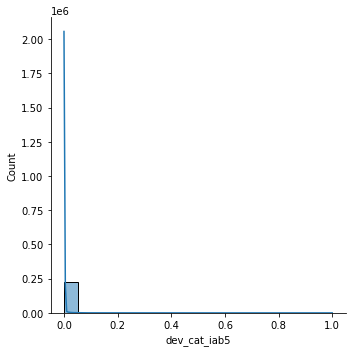

-----------------------------
Column : dev_cat_iab7


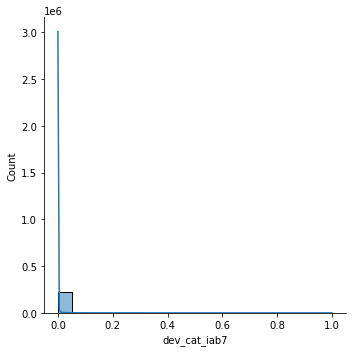

-----------------------------
Column : dev_cat_iab9


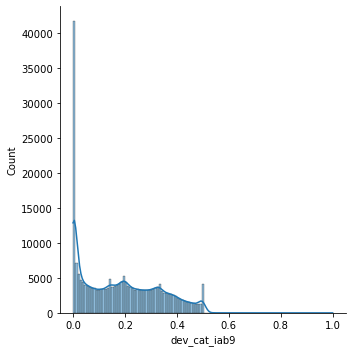

-----------------------------
Column : dev_cat_iab9_23


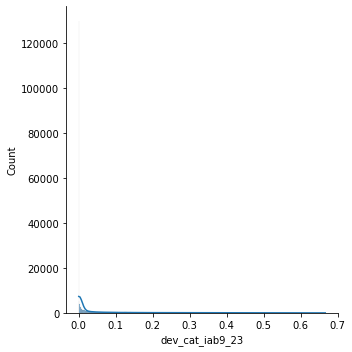

-----------------------------
Column : dev_cat_iab9_30


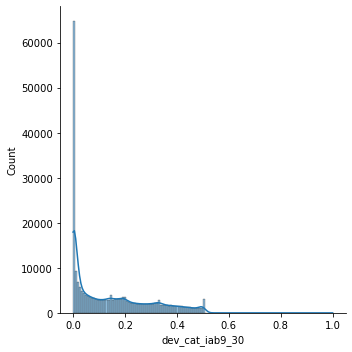

-----------------------------
Column : dev_cat_books


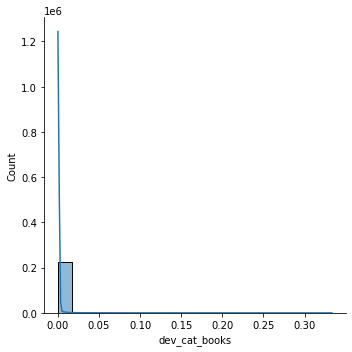

-----------------------------
Column : dev_cat_finance


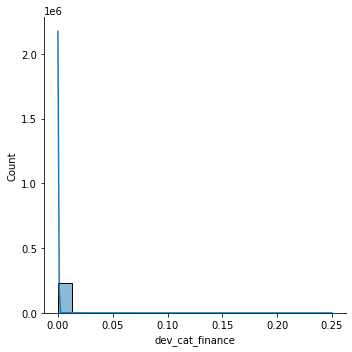

-----------------------------
Column : dev_cat_games


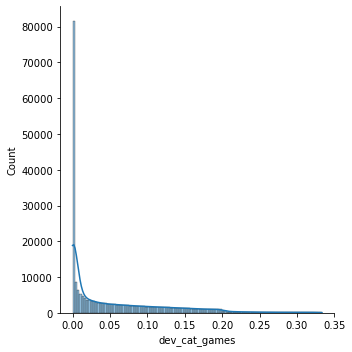

-----------------------------
Column : dev_cat_lifestyle


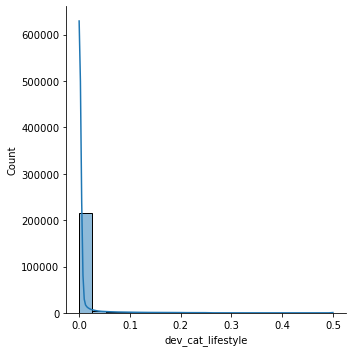

-----------------------------
Column : dev_cat_navigation


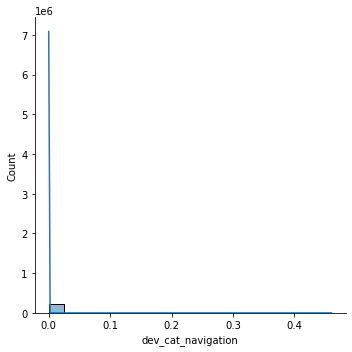

-----------------------------
Column : dev_cat_productivity


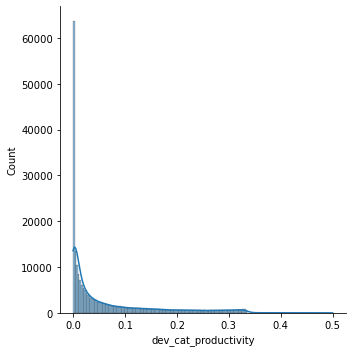

-----------------------------
Column : dev_cat_reference


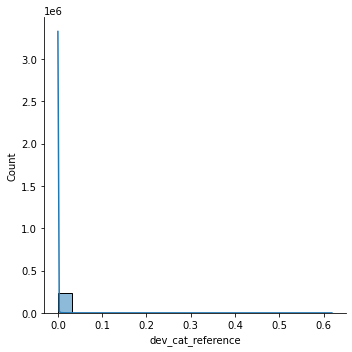

-----------------------------
Column : dev_cat_utilities


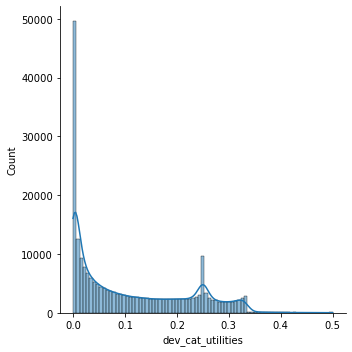

-----------------------------


In [18]:
nrows = 2
ncols = 13
#fig, axes = plt.subplots(nrows,ncols,figsize=(13,5))

#for name, ax in zip(cols[2:], axes.flatten()):
#    sns.displot(eda[name], ax=ax, kde = True)
    
#fig.tight_layout()

for i in cols[2:]:
    print('Column :',i)
    sns.displot(eda[i], kde = True)
    plt.show()
    print('-----------------------------')


In [19]:
# None looks symmetrical
# Impute using medians
for col_name in cols[2:]:
    eda[col_name] = eda[col_name].fillna(eda[col_name].median())

In [20]:
eda.describe()

,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,daypart_work,...,dev_cat_iab9_23,dev_cat_iab9_30,dev_cat_books,dev_cat_finance,dev_cat_games,dev_cat_lifestyle,dev_cat_navigation,dev_cat_productivity,dev_cat_reference,dev_cat_utilities
count,230263.000000,230263.000000,230263.000000,230263.000000,229188.000000,230263.000000,230263.000000,230263.000000,230263.000000,230263.000000,...,230263.000000,230263.000000,230263.000000,230263.000000,230263.000000,230263.000000,230263.000000,230263.000000,230263.000000,230263.000000
mean,110.296487,3691.911506,29.784212,0.869428,10.070161,0.001956,0.327670,0.531883,0.115616,0.352501,...,0.044689,0.140859,0.001539,0.000343,0.054759,0.008382,0.000093,0.066488,0.000626,0.109923
std,119.764555,13482.677822,89.977826,0.336933,10.032108,0.033722,0.338309,0.215459,0.121270,0.203546,...,0.096311,0.149819,0.014740,0.006505,0.069647,0.039680,0.003688,0.092115,0.010452,0.108917
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,294.000000,7.653850,1.000000,4.000000,0.000000,0.012579,0.403220,0.036880,0.217465,...,0.000000,0.003740,0.000000,0.000000,0.000000,0.000000,0.000000,0.001965,0.000000,0.010094
50%,71.000000,1027.000000,14.557520,1.000000,7.000000,0.000000,0.192857,0.532260,0.091930,0.336360,...,0.000000,0.089202,0.000000,0.000000,0.021592,0.000000,0.000000,0.021430,0.000000,0.069831
75%,153.000000,3077.000000,29.308800,1.000000,13.000000,0.000000,0.626305,0.666670,0.153370,0.461540,...,0.029818,0.243240,0.000000,0.000000,0.092800,0.000000,0.000000,0.095670,0.000000,0.205828
max,1262.000000,996971.000000,9352.333330,1.000000,167.000000,0.999682,1.000000,1.000000,1.000000,1.000000,...,0.666667,1.000000,0.333213,0.250000,0.333333,0.500000,0.460349,0.500000,0.618652,0.500000


### Cellular & Wifi Imputation

In [21]:
print('Cellular - Number of unique values : ',eda['cellular'].nunique())
print(eda['cellular'].describe())
print(eda['cellular'].value_counts())
print('--------------------------------------------------')

Cellular - Number of unique values :  55914
count    230218.000000
mean          0.810909
std           0.290568
min           0.000000
25%           0.725650
50%           0.978570
75%           1.000000
max           1.000000
Name: cellular, dtype: float64
1.00000    81708
0.00000     5125
0.50000      174
0.66667      139
0.33333      104
           ...  
0.10217        1
0.86091        1
0.09014        1
0.63182        1
0.59109        1
Name: cellular, Length: 55914, dtype: int64
--------------------------------------------------


In [22]:
print('Wifi - Number of unique values : ',eda['wifi'].nunique())
print(eda['wifi'].describe())
print(eda['wifi'].value_counts())

Wifi - Number of unique values :  55920
count    230218.000000
mean          0.189091
std           0.290568
min           0.000000
25%           0.000000
50%           0.021430
75%           0.274350
max           1.000000
Name: wifi, dtype: float64
0.00000    81708
1.00000     5125
0.50000      174
0.33333      139
0.66667      104
           ...  
0.73851        1
0.46826        1
0.23677        1
0.55634        1
0.40891        1
Name: wifi, Length: 55920, dtype: int64


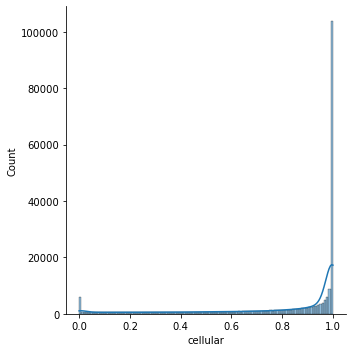

In [23]:
sns.displot(eda['cellular'], kde = True)

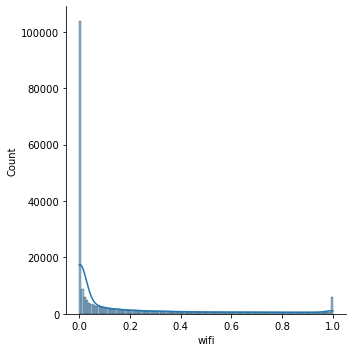

In [24]:
sns.displot(eda['wifi'], kde = True)

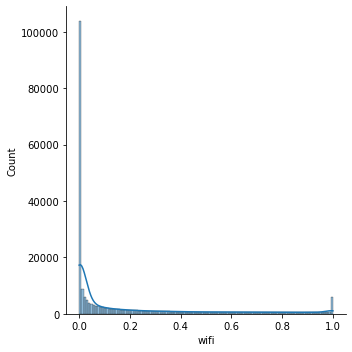

In [25]:
# Impute - median value
eda['cellular'] = eda['cellular'].fillna(eda['cellular'].median())
eda['wifi'] = eda['wifi'].fillna(eda['wifi'].median())
sns.displot(eda['wifi'],kde=True)

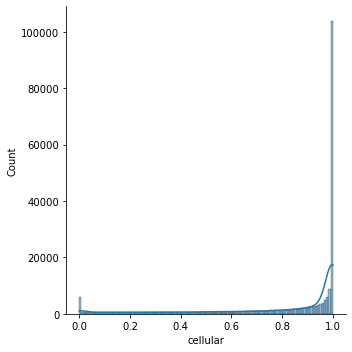

In [26]:
sns.displot(eda['cellular'],kde=True)

### Distinct_app count variations

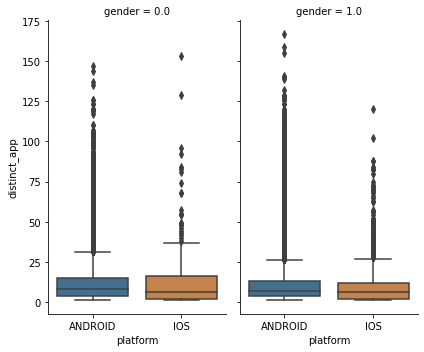

In [27]:
sns.catplot(x="platform", y="distinct_app", col="gender",
                data=eda, saturation=.5,
                kind="box", ci=None, aspect=.6)

In [28]:
eda['distinct_app'].describe()

count    229188.000000
mean         10.070161
std          10.032108
min           1.000000
25%           4.000000
50%           7.000000
75%          13.000000
max         167.000000
Name: distinct_app, dtype: float64

In [29]:
eda['distinct_app'].median()

7.0

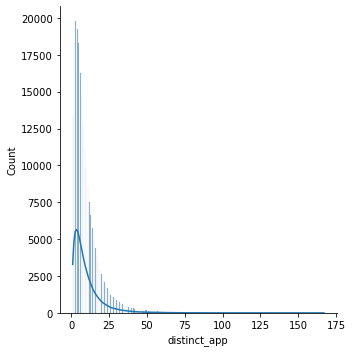

In [30]:
sns.displot(eda['distinct_app'],kde=True)

In [31]:
print('Overall - ')
print(eda['distinct_app'].value_counts(ascending= False))
print('----------------------------------')
print(eda.groupby('distinct_app')['gender'].value_counts(ascending= False))

Overall - 
3.0      19790
4.0      19260
2.0      18383
5.0      18287
6.0      16249
         ...  
155.0        1
141.0        1
167.0        1
128.0        1
144.0        1
Name: distinct_app, Length: 137, dtype: int64
----------------------------------
distinct_app  gender
1.0           1.0       11231
              0.0        2104
2.0           1.0       15967
              0.0        2416
3.0           1.0       17313
                        ...  
147.0         0.0           1
153.0         0.0           1
155.0         1.0           1
159.0         1.0           1
167.0         1.0           1
Name: gender, Length: 249, dtype: int64


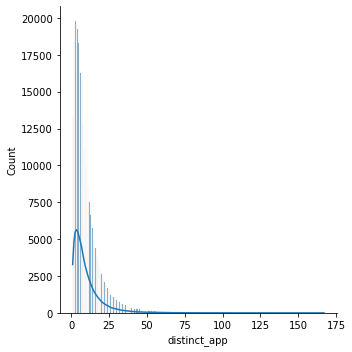

In [32]:
# Impute - median value
eda['distinct_app'] = eda['distinct_app'].fillna(eda['distinct_app'].median())
sns.displot(eda['distinct_app'],kde=True)

In [33]:
eda['distinct_app'].isnull().sum()

0

### Categorical Variables - Platform & Device Category

In [34]:
print('Overall - ')
print(eda['platform'].value_counts())
print('----------------------------------')
print(eda.groupby('platform')['gender'].value_counts())

Overall - 
ANDROID    225891
IOS          3734
Name: platform, dtype: int64
----------------------------------
platform  gender
ANDROID   1.0       196759
          0.0        29132
IOS       1.0         2907
          0.0          827
Name: gender, dtype: int64


In [35]:
print('Overall - ')
print(eda['device_category'].value_counts())
print('----------------------------------')
print(eda.groupby('device_category')['gender'].value_counts())

Overall - 
SMART PHONE    226013
TABLET           1585
Name: device_category, dtype: int64
----------------------------------
device_category  gender
SMART PHONE      1.0       196768
                 0.0        29245
TABLET           1.0         1206
                 0.0          379
Name: gender, dtype: int64


In [36]:
# Categorical Columns - Platform, Device_Category - mode imputation
eda['platform'] = eda['platform'].fillna(eda['platform'].value_counts().index[0])
eda['device_category'] = eda['device_category'].fillna(eda['device_category'].value_counts().index[0])
eda.isnull().sum()

ifa                     0
platform                0
first_seen              0
last_seen               0
num_days                0
brq                     0
brq_engagement          0
gender                  0
distinct_app            0
skewness_female         0
skewness_male           0
daypart_home            0
daypart_other           0
daypart_work            0
device_category         0
cellular                0
wifi                    0
dev_cat_iab1            0
dev_cat_iab1_1          0
dev_cat_iab1_6          0
dev_cat_iab12           0
dev_cat_iab13           0
dev_cat_iab14           0
dev_cat_iab15           0
dev_cat_iab15_10        0
dev_cat_iab17           0
dev_cat_iab19           0
dev_cat_iab19_29        0
dev_cat_iab20           0
dev_cat_iab3            0
dev_cat_iab5            0
dev_cat_iab7            0
dev_cat_iab9            0
dev_cat_iab9_23         0
dev_cat_iab9_30         0
dev_cat_books           0
dev_cat_finance         0
dev_cat_games           0
dev_cat_life

## All missing values are now dealt with!
## Let's look at outliers - 

In [37]:
def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))

    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))
    
    if qu_fence == "inner":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
    elif qu_fence == "outer":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    else:
        output_dataset = qu_dataset
    
    print("length of input dataframe:", len(qu_dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))
    
    return output_dataset


In [38]:
eda_outlier = eda.copy()
num_cols_check = ['num_days', 'brq', 'brq_engagement', 'distinct_app', 'skewness_female',
       'skewness_male', 'daypart_home', 'daypart_other', 'daypart_work',
       'cellular', 'wifi']
for n in num_cols_check:
    print('Changes for column:', n)
    eda_outlier = remove_outliers_using_quantiles(eda_outlier, n, "outer")

Changes for column: num_days
interquartile range: 127.0
upper_inner_fence: 343.5
lower_inner_fence: -164.5
upper_outer_fence: 534.0
lower_outer_fence: -355.0
percentage of records out of inner fences: 5.48
percentage of records out of outer fences: 1.20
length of input dataframe: 230263
length of new dataframe after outlier removal: 227491
Changes for column: brq
interquartile range: 2654.0
upper_inner_fence: 6923.0
lower_inner_fence: -3693.0
upper_outer_fence: 10904.0
lower_outer_fence: -7674.0
percentage of records out of inner fences: 10.42
percentage of records out of outer fences: 5.76
length of input dataframe: 227491
length of new dataframe after outlier removal: 214385
Changes for column: brq_engagement
interquartile range: 17.94371
upper_inner_fence: 52.145565000000005
lower_inner_fence: -19.629275
upper_outer_fence: 79.06113
lower_outer_fence: -46.54484
percentage of records out of inner fences: 7.72
percentage of records out of outer fences: 3.39
length of input dataframe: 2

In [39]:
eda_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196266 entries, 0 to 230262
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ifa                   196266 non-null  object 
 1   platform              196266 non-null  object 
 2   first_seen            196266 non-null  object 
 3   last_seen             196266 non-null  object 
 4   num_days              196266 non-null  float64
 5   brq                   196266 non-null  int64  
 6   brq_engagement        196266 non-null  float64
 7   gender                196266 non-null  float64
 8   distinct_app          196266 non-null  float64
 9   skewness_female       196266 non-null  float64
 10  skewness_male         196266 non-null  float64
 11  daypart_home          196266 non-null  float64
 12  daypart_other         196266 non-null  float64
 13  daypart_work          196266 non-null  float64
 14  device_category       196266 non-null  object 
 15  

## Saving this clean dataframe - ready for next steps 


In [40]:
eda_outlier.to_csv('clean_df.csv',index=False)

## Next Steps - app propensity dataset & app metadata --- 

## App propensity scores

In [3]:
app_propensity = pd.read_csv(os.path.join(filepath, 'app_propensity_data.csv'))
app_propensity.head()

,ifa,bundle,weight
0,7ee413f5f44783ebd036b30f62a7d8cd94a5a844e27416...,com.lenovo.anyshare.gps,0.18772
1,7ee413f5f44783ebd036b30f62a7d8cd94a5a844e27416...,com.kathleenOswald.solitaireGooglePlay,0.27845
2,7ee413f5f44783ebd036b30f62a7d8cd94a5a844e27416...,com.utorrent.client,0.53382
3,0abc06345b72381509cc7a1662486d9b42346aa142a34e...,com.lenovo.anyshare.gps,0.05908
4,0abc06345b72381509cc7a1662486d9b42346aa142a34e...,com.lyrebirdstudio.instasquare,0.17523


In [4]:
print('Shape: ',app_propensity.shape)
print('#Unique ifa entries: ',app_propensity['ifa'].nunique())
app_propensity['ifa'].value_counts()


Shape:  (2775360, 3)
#Unique ifa entries:  273814


08e7c5fbf184131661c9182931ed3d1c4305de8e5c5b51b035063dbd9c6d262a    316
d6d6679fb4da6a5ccd9618a1b1143195efc5c0efe13c0e2d27cbe4b29e284b20    178
26754ed77c3e2245dab37c1edfe275d1cfce203241fe8be877e9a1cebbb49a74    167
ab1c6559edb92422909b106d8fa1cc987356bd5ff603306ba645ce97129b5273    159
7ff272501211ae7689e30f835d97d7b9699c2f64f2d4649d654ebaa0ea0a8ae5    156
                                                                   ... 
f6307f918e1329622cbbc73b9731491282c4303ace4ef6d8643b68f039825c83      1
ffdaf122cadaa99937179bf0de855f94e786ac4688c7386a1d7902f5eb6c8418      1
c214a714b693c3b9588354ec0b7225c310bf92e5f4f7acabee9535f848ef0353      1
816c1c32fb30cbc56876235e72c290a4ab8badc7ab3c8e7d6f536c46620efcf6      1
e14a20249d95d4ffa9bd5f8e408aa58db295a831a816d64bbce52f457bbdf80e      1
Name: ifa, Length: 273814, dtype: int64

In [5]:
print(app_propensity['ifa'].value_counts().index[0])
check = app_propensity['ifa'].value_counts().index[0]
check_2 = app_propensity['ifa'].value_counts().index[1]
ch_ = app_propensity[app_propensity['ifa'] == check]
ch_2 = app_propensity[app_propensity['ifa'] == check_2]
print("Sum of weights check for two random ifa values", ch_['weight'].sum(),ch_2['weight'].sum())

08e7c5fbf184131661c9182931ed3d1c4305de8e5c5b51b035063dbd9c6d262a
Sum of weights check for two random ifa values 1.00023 1.00011


In [6]:
app_propensity.isnull().sum()

ifa       0
bundle    1
weight    0
dtype: int64

In [7]:
app_propensity = app_propensity.dropna()
app_propensity = app_propensity.reset_index(drop = True)
app_propensity.head()

,ifa,bundle,weight
0,7ee413f5f44783ebd036b30f62a7d8cd94a5a844e27416...,com.lenovo.anyshare.gps,0.18772
1,7ee413f5f44783ebd036b30f62a7d8cd94a5a844e27416...,com.kathleenOswald.solitaireGooglePlay,0.27845
2,7ee413f5f44783ebd036b30f62a7d8cd94a5a844e27416...,com.utorrent.client,0.53382
3,0abc06345b72381509cc7a1662486d9b42346aa142a34e...,com.lenovo.anyshare.gps,0.05908
4,0abc06345b72381509cc7a1662486d9b42346aa142a34e...,com.lyrebirdstudio.instasquare,0.17523


## App Metadata

In [10]:

import csv
app_metadata = pd.read_csv(os.path.join(filepath, 'app_metadata.csv'),sep=',',skipinitialspace=True,quoting= csv.QUOTE_ALL,engine='python',escapechar='\\',on_bad_lines='skip')
app_metadata.head()

,appId,id,bundleId,os,lang,country,name,description,developer,deviceCategory,...,whatsNew,videoUrl,secCategory,metaInfo,crawlTime,devHomepage,publisherEmail,publisherAddress,UUID,permissionList
0,1040093707,1040093707,com.zuletteran.scannerfree,IOS,"[""NL"",""EN"",""FR"",""DE"",""IT"",""JA"",""KO"",""PT"",""RU"",...",gb,Scanner App: PDF Document Scan,iScanner is a handy scanner app that will turn...,BPMobile,*,...,NaN,NaN,6000|6007,NaN,1570684495073,NaN,NaN,NaN,NaN,NaN
1,1040093707,1040093707,com.zuletteran.scannerfree,IOS,"[""NL"",""EN"",""FR"",""DE"",""IT"",""JA"",""KO"",""PT"",""RU"",...",hk,iScanner - PDF掃描儀,iScanner是一款方便實用的掃描APP，可將你的iPhone或iPad變成一個強大的移動...,BPMobile,*,...,NaN,NaN,6000|6007,NaN,1570684492601,NaN,NaN,NaN,NaN,NaN
2,1040093707,1040093707,com.zuletteran.scannerfree,IOS,"[""NL"",""EN"",""FR"",""DE"",""IT"",""JA"",""KO"",""PT"",""RU"",...",lk,Scanner App: PDF Document Scan,iScanner is a handy scanner app that will turn...,BPMobile,*,...,NaN,NaN,6000|6007,NaN,1570684520175,NaN,NaN,NaN,NaN,NaN
3,1040093707,1040093707,com.zuletteran.scannerfree,IOS,"[""NL"",""EN"",""FR"",""DE"",""IT"",""JA"",""KO"",""PT"",""RU"",...",sg,Scanner App: PDF Document Scan,iScanner is a handy scanner app that will turn...,BPMobile,*,...,NaN,NaN,6000|6007,NaN,1570684526703,NaN,NaN,NaN,NaN,NaN
4,1040093707,1040093707,com.zuletteran.scannerfree,IOS,"[""NL"",""EN"",""FR"",""DE"",""IT"",""JA"",""KO"",""PT"",""RU"",...",kr,iScanner - 문서를 PDF로 스캔,iScanner는 iOS 장치를 강력한 모바일 텍스트 스캐너로 바꾸는 편리한 포토 ...,BPMobile,*,...,NaN,NaN,6000|6007,NaN,1570684518950,NaN,NaN,NaN,NaN,NaN


In [11]:
print("Shape: ",app_metadata.shape)
app_metadata.columns

Shape:  (190254, 43)


Index(['appId', 'id', 'bundleId', 'os', 'lang', 'country', 'name',
       'description', 'developer', 'deviceCategory', 'devId', 'storeDevId',
       'appUrl', 'currRatingScore', 'currRatingCount', 'ratingScore',
       'ratingCount', 'price', 'category', 'updateStr', 'version',
       'sellerName', 'size', 'icon', 'screenShot', 'language', 'releaseDate',
       'releaseDateFlag', 'updateDate', 'contentRating', 'osVersion',
       'downloadRange', 'permissions', 'whatsNew', 'videoUrl', 'secCategory',
       'metaInfo', 'crawlTime', 'devHomepage', 'publisherEmail',
       'publisherAddress', 'UUID', 'permissionList'],
      dtype='object')

In [12]:
# Picking unique bundleId, appId values
ids = app_metadata[['appId','bundleId']]
ids = ids.drop_duplicates()
print(ids.shape)
print(ids.isnull().sum())
ids = ids.dropna()
ids = ids.reset_index(drop=True)
print(ids.shape)
ids.rename(columns={'appId': 'appId_idx', 'bundleId': 'bundleId_idx'}, inplace=True)
print(ids.head())

(15719, 2)
appId         0
bundleId    558
dtype: int64
(15161, 2)
    appId_idx                  bundleId_idx
0  1040093707    com.zuletteran.scannerfree
1  1114751883          com.miniclip.diep.io
2  1255469255                  gg.analytics
3  1299745483       com.ketchapp.2048bricks
4  1300550045  com.salmanios.scorpion.robot


#### Columns that might be of interest --  'appId','bundleId','ratingScore','ratingCount', 'price', 'category','contentRating'

In [13]:
app_metadata.isnull().sum()

appId                    0
id                     376
bundleId              2232
os                    3580
lang                   500
country                  0
name                     0
description              0
developer              816
deviceCategory       28948
devId                  816
storeDevId          135755
appUrl                 796
currRatingScore      31180
currRatingCount      31180
ratingScore           2687
ratingCount           2687
price                  832
category               504
updateStr           166619
version               2180
sellerName           31180
size                 29180
icon                     0
screenShot              59
language            134943
releaseDate          31680
releaseDateFlag     166619
updateDate             436
contentRating            0
osVersion           135439
downloadRange       135471
permissions         143771
whatsNew            160671
videoUrl            166619
secCategory          55315
metaInfo            160806
c

ContentRating has no null values, should be a good index to consider. Category seems to have good data too.

In [14]:
#currRatingScore
app_metadata[['currRatingScore']].value_counts()

currRatingScore
4.5                44790
0                  39397
5.0                24944
NIL                23635
4.0                13666
3.5                 4551
3.0                 3815
1.0                 1621
2.5                 1396
2.0                  902
1.5                  329
0.0                   28
dtype: int64

In [15]:
app_metadata[['contentRating']].isnull().sum()

contentRating    0
dtype: int64

In [16]:
app_metadata['price'].value_counts(ascending = False)

0            188907
NIL              23
6,99 €           20
8,99 €           20
3,49 €           20
              ...  
25,00 kr          3
25,00 kr          1
S$ 2.98           1
Rp 29ribu         1
HK$ 15.00         1
Name: price, Length: 100, dtype: int64

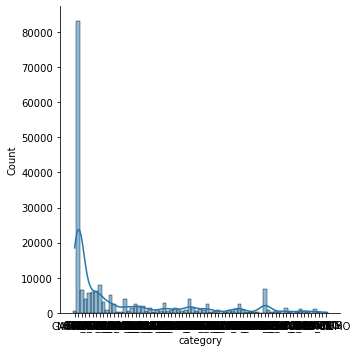

In [17]:
sns.displot(app_metadata['category'],kde = True,)


In [18]:
app_metadata['category'].value_counts(ascending = False)

6014                  83133
GAME_SIMULATION        8063
6016                   6864
6005                   6576
6002                   6244
                      ...  
HOUSE_AND_HOME           52
FOOD_AND_DRINK           44
LIBRARIES_AND_DEMO       36
PARENTING                32
EVENTS                   12
Name: category, Length: 71, dtype: int64

In [19]:
app_metadata['category'].unique()

array(['6000', '6014', '6005', '6013', '6008', '6011', '6002',
       'GAME_SIMULATION', 'GAME_CASUAL', 'COMMUNICATION', 'GAME_ACTION',
       'GAME_PUZZLE', 'NEWS_AND_MAGAZINES', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'AUTO_AND_VEHICLES', 'GAME_SPORTS', 'GAME_RACING', 'PHOTOGRAPHY',
       'PERSONALIZATION', 'GAME_BOARD', 'MUSIC_AND_AUDIO', 'WEATHER',
       'GAME_ROLE_PLAYING', 'GAME_STRATEGY', 'ENTERTAINMENT',
       'GAME_EDUCATIONAL', 'GAME_WORD', 'GAME_ADVENTURE', 'LIFESTYLE',
       'SPORTS', 'BOOKS_AND_REFERENCE', '6012', '6004', '6003',
       'HEALTH_AND_FITNESS', 'SOCIAL', 'GAME_ARCADE', 'FINANCE', 'COMICS',
       'GAME_CARD', 'FOOD_AND_DRINK', 'DATING', 'VIDEO_PLAYERS',
       'PRODUCTIVITY', 'EDUCATION', '6007', '6006', 'MAPS_AND_NAVIGATION',
       'GAME_CASINO', 'BUSINESS', 'SHOPPING', 'BEAUTY', '6016', '6001',
       'GAME_TRIVIA', '6010', 'GAME_MUSIC', 'HOUSE_AND_HOME', '6018',
       'ART_AND_DESIGN', 'LIBRARIES_AND_DEMO', 'MEDICAL', '6009', '6015',
       '6024', 'PARE

In [20]:
#Get unique rows with category,appId,bundleId,contentrating
interest = app_metadata[['appId','bundleId', 'price', 'category','contentRating','ratingScore','ratingCount']]
print(interest.shape)
print(interest.isnull().sum())

(190254, 7)
appId               0
bundleId         2232
price             832
category          504
contentRating       0
ratingScore      2687
ratingCount      2687
dtype: int64


In [21]:
interest.drop_duplicates()
print(interest.shape)
print(interest['bundleId'].nunique())

(190254, 7)
14626


In [22]:
interest.sort_values(by='appId',inplace=True)
interest.fillna(method='ffill')
print(interest.isnull().sum())

appId               0
bundleId         2232
price             832
category          504
contentRating       0
ratingScore      2687
ratingCount      2687
dtype: int64


In [23]:
interest

,appId,bundleId,price,category,contentRating,ratingScore,ratingCount
90668,1001043187,com.triviador.trxe,0,6014,4+,3.0,10
90672,1001043187,com.triviador.trxe,0,6014,4+,2.5,25
90671,1001043187,com.triviador.trxe,0,6014,4+,2.5,25
90670,1001043187,com.triviador.trxe,0,6014,4+,2.5,25
90669,1001043187,com.triviador.trxe,0,6014,4+,3.0,10
...,...,...,...,...,...,...,...
100225,zone.gaychat.app,zone.gaychat.app,0,SOCIAL,Rated for 18+,3.8375000953674316,80
91876,zoo.rescue,zoo.rescue,0,GAME_PUZZLE,Rated for 3+,4.600623607635498,18917
91874,zoo.rescue,zoo.rescue,0,GAME_PUZZLE,Rated for 3+,4.600623607635498,18917
91875,zoo.rescue,zoo.rescue,0,GAME_PUZZLE,Rated for 3+,4.600623607635498,18917


In [24]:
interest_2 = app_metadata[['appId','bundleId','category','contentRating']]
interest_2 = interest_2.drop_duplicates()
print(interest_2.shape)
print(interest_2.isnull().sum())

(15735, 4)
appId              0
bundleId         558
category          34
contentRating      0
dtype: int64


In [25]:
# Replace null values with ids dataframe if any - 
out_df = (interest_2.merge(ids, left_on='appId', right_on='appId_idx')
          .reindex(columns=['appId', 'bundleId', 'category', 'contentRating','bundleId_idx']))
print(out_df.isnull().sum())
out_df.drop('bundleId', axis=1, inplace=True)
out_df.rename(columns={'bundleId_idx': 'bundleId'}, inplace=True)
out_df.head()

appId               0
bundleId           33
category         1122
contentRating       0
bundleId_idx        0
dtype: int64


,appId,category,contentRating,bundleId
0,1040093707,6000,4+,com.zuletteran.scannerfree
1,1114751883,6014,9+,com.miniclip.diep.io
2,1255469255,6005,12+,gg.analytics
3,1299745483,6014,4+,com.ketchapp.2048bricks
4,1300550045,6014,9+,com.salmanios.scorpion.robot


In [26]:
print(out_df.isnull().sum())
out_df = out_df.dropna()
out_df.shape

appId               0
category         1122
contentRating       0
bundleId            0
dtype: int64


(15176, 4)

## App propensity & metadata merge

In [27]:
merged = app_propensity.merge(out_df,left_on= 'bundle',right_on= 'bundleId').reindex(columns = ['ifa','bundle','weight','appId','category','contentRating'])
print(merged.shape)
merged.head(2)


(3492775, 6)


,ifa,bundle,weight,appId,category,contentRating
0,7ee413f5f44783ebd036b30f62a7d8cd94a5a844e27416...,com.lenovo.anyshare.gps,0.18772,com.lenovo.anyshare.gps,TOOLS,Rated for 3+
1,0abc06345b72381509cc7a1662486d9b42346aa142a34e...,com.lenovo.anyshare.gps,0.05908,com.lenovo.anyshare.gps,TOOLS,Rated for 3+


In [28]:
merged.isnull().sum()

ifa              0
bundle           0
weight           0
appId            0
category         0
contentRating    0
dtype: int64

In [29]:
merged.to_csv('merged_appdata.csv', index= False)

## Voila! We now have a refined dataframe made from app_propensity & metadata 
#### How can we combine these attributes with our dataframe?

In [30]:
merged.shape

(3492775, 6)

In [31]:
merged = merged.drop_duplicates()
merged.shape

(3492775, 6)

In [32]:
merged['category'].unique()

array(['TOOLS', 'GAME_CARD', 'VIDEO_PLAYERS', 'PHOTOGRAPHY', 'LIFESTYLE',
       '6014', 'GAME_PUZZLE', 'GAME_TRIVIA', 'GAME_WORD', 'GAME_BOARD',
       'ENTERTAINMENT', '6016', 'GAME_ARCADE', 'GAME_CASUAL',
       'GAME_ACTION', 'NEWS_AND_MAGAZINES', 'GAME_RACING',
       'PERSONALIZATION', 'GAME_SPORTS', 'GAME_SIMULATION', 'SOCIAL',
       'HEALTH_AND_FITNESS', 'PRODUCTIVITY', 'MUSIC_AND_AUDIO', 'COMICS',
       '6004', 'COMMUNICATION', 'GAME_MUSIC', 'AUTO_AND_VEHICLES',
       'EDUCATION', 'HOUSE_AND_HOME', 'GAME_STRATEGY', 'SPORTS', '6008',
       'TRAVEL_AND_LOCAL', 'GAME_EDUCATIONAL', 'BUSINESS', 'WEATHER',
       'BOOKS_AND_REFERENCE', 'GAME_ADVENTURE', '6011',
       'GAME_ROLE_PLAYING', 'GAME_CASINO', 'DATING', '6007', '6005',
       '6000', '6013', '6012', 'SHOPPING', 'PARENTING', 'FINANCE',
       'MEDICAL', 'LIBRARIES_AND_DEMO', '6002', 'ART_AND_DESIGN',
       'MAPS_AND_NAVIGATION', 'BEAUTY', 'EVENTS', 'FOOD_AND_DRINK',
       '6020', '6024', '6018', '6010', '6006', '6015'

In [33]:
print(merged.groupby('category')['weight'].sum())

category
6000                 1128.75958
6001                    0.00426
6002                   36.44025
6003                    0.01601
6004                  193.83532
                       ...     
SPORTS                869.56421
TOOLS               33151.25059
TRAVEL_AND_LOCAL      251.37425
VIDEO_PLAYERS       49738.70434
WEATHER               260.28919
Name: weight, Length: 68, dtype: float64


### For every ifa I can have a set of columns - rolled open categories - with summed propensity scores, if none then zero. 

### "ifa" - "respective category propensity score"

In [34]:

new_df = merged.groupby(['ifa','category'])['weight'].sum().reset_index()
new_df.head()

,ifa,category,weight
0,00002c2abb627089988287fa9cb1569b43076bdfdad67d...,COMMUNICATION,0.00176
1,00002c2abb627089988287fa9cb1569b43076bdfdad67d...,GAME_CARD,0.00177
2,00002c2abb627089988287fa9cb1569b43076bdfdad67d...,SOCIAL,0.00708
3,00002c2abb627089988287fa9cb1569b43076bdfdad67d...,TOOLS,0.17354
4,00002c2abb627089988287fa9cb1569b43076bdfdad67d...,VIDEO_PLAYERS,0.81407


In [35]:
print("Length: ", len(new_df['category'].unique()))
new_df['category'].unique()

Length:  68


array(['COMMUNICATION', 'GAME_CARD', 'SOCIAL', 'TOOLS', 'VIDEO_PLAYERS',
       'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', '6011', '6014',
       '6016', 'ENTERTAINMENT', 'GAME_ACTION', 'GAME_BOARD',
       'GAME_CASUAL', 'GAME_PUZZLE', 'GAME_SIMULATION', 'GAME_SPORTS',
       'GAME_STRATEGY', 'MUSIC_AND_AUDIO', 'NEWS_AND_MAGAZINES',
       'GAME_ARCADE', 'GAME_RACING', 'HEALTH_AND_FITNESS', '6008',
       'GAME_WORD', '6000', 'LIFESTYLE', 'GAME_MUSIC', 'DATING', 'SPORTS',
       'GAME_ROLE_PLAYING', 'PARENTING', 'SHOPPING', 'GAME_TRIVIA',
       'FINANCE', 'BUSINESS', 'TRAVEL_AND_LOCAL', 'AUTO_AND_VEHICLES',
       '6012', '6004', 'GAME_EDUCATIONAL', 'WEATHER',
       'BOOKS_AND_REFERENCE', 'GAME_ADVENTURE', '6005',
       'LIBRARIES_AND_DEMO', 'COMICS', 'EDUCATION', 'MAPS_AND_NAVIGATION',
       '6002', 'GAME_CASINO', 'HOUSE_AND_HOME', '6007', '6013', 'MEDICAL',
       'ART_AND_DESIGN', 'FOOD_AND_DRINK', 'BEAUTY', 'EVENTS', '6015',
       '6020', '6024', '6001', '6018', '6003'

In [36]:
ifa_catscores = new_df.pivot(index='ifa', columns='category', values='weight').reset_index()
ifa_catscores.isnull().sum()

category
ifa                      0
6000                261965
6001                269884
6002                269280
6003                269886
                     ...  
SPORTS              263686
TOOLS                85262
TRAVEL_AND_LOCAL    265966
VIDEO_PLAYERS        95849
WEATHER             266071
Length: 69, dtype: int64

In [37]:
ifa_catscores = ifa_catscores.fillna(0)
ifa_catscores.head(5)


category,ifa,6000,6001,6002,6003,6004,6005,6006,6007,6008,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,00002c2abb627089988287fa9cb1569b43076bdfdad67d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.00000,0.00000,0.0,0.00708,0.0,0.17354,0.0,0.81407,0.0
1,00009f893e849715bcc809dd0891e78bc4ef9dd3061eac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7635,0.03187,0.00000,0.0,0.00646,0.0,0.02586,0.0,0.00000,0.0
2,0000ac97665d160ff6c012f0af44a13a83d0065cdd8046...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.39687,0.03031,0.0,0.00000,0.0,0.51015,0.0,0.06267,0.0
3,0000bef11e506141ce0f4159e0412038c892477ff7752b...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.01475,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
4,000123a2d98e624b7f11b4fc81f9879bc8b7aab9c7dc75...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.37289,0.27507,0.0,0.00000,0.0,0.25724,0.0,0.09481,0.0


In [38]:
print(ifa_catscores.shape)
ifa_catscores.to_csv('ifa_catscores.csv',index = False)

(269887, 69)


### Although there's a huge chunk of zeros in here, let's filter those out later! For now this seems perfect for our use.

## We now have two dataframes - One ifa train data & two app category propensity scores for each ifa.
### Let's combine these and process them further in the next notebook

# You've reached the end. Thank you!